In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/all.csv')
df.head()

,month,url,count
0,2021-10,http://www.transform-social.org/,610
1,2021-10,http://www.transform-social.org/robots.txt,433
2,2021-10,http://www.transform-social.org/texte/eso/,98
3,2021-10,http://www.transform-social.org/css/custom.css,86
4,2021-10,http://www.transform-social.org/texte/,84


In [4]:
df['count'].max()

806

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [26]:
df = df.sort_values(by=['month', 'count'], ascending=[True, False])
df = df.reset_index(drop=True)
df.head()

,month,url,count
0,2017-12,http://www.transform-social.org/,65
1,2017-12,http://www.transform-social.org/wasistdas/,12
2,2017-12,http://www.transform-social.org/texte/,10
3,2017-12,http://www.transform-social.org/bibliothek/,5
4,2017-12,http://www.transform-social.org/texte/konflikte/,2


<IPython.core.display.Javascript object>


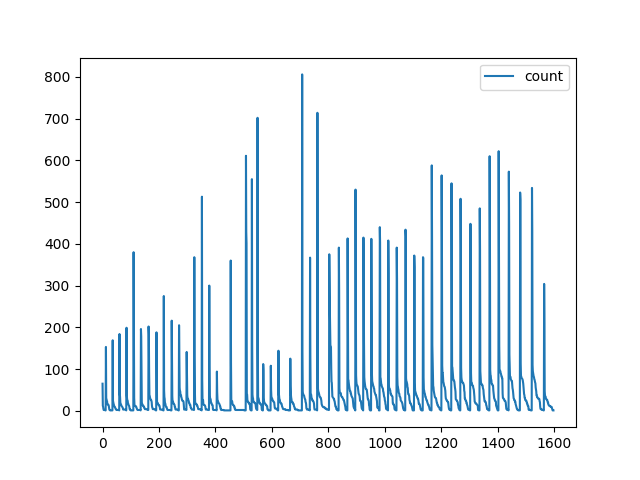

<AxesSubplot:>

In [8]:
df.plot()

In [22]:
sums = df.groupby(by = ['month']).sum()
sums.head(200)

,count
month,
2017-12,106
2018-01,367
2018-02,326
2018-03,414
2018-04,418
2018-05,739
2018-06,635
2018-07,805
2018-08,492


<IPython.core.display.Javascript object>


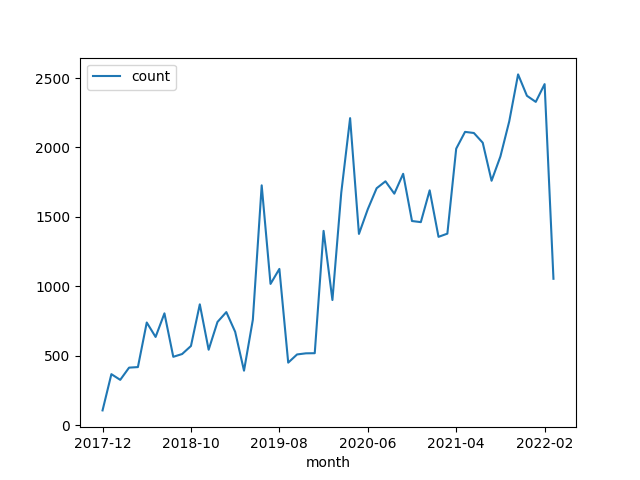

<AxesSubplot:xlabel='month'>

In [10]:
sums.plot()

In [11]:
main_url = df[df['url'] == 'http://www.transform-social.org/']
sums = main_url.groupby(by = ['month']).sum()
sums.head()

,count
month,
2017-12,65
2018-01,153
2018-02,169
2018-03,184
2018-04,199


<IPython.core.display.Javascript object>


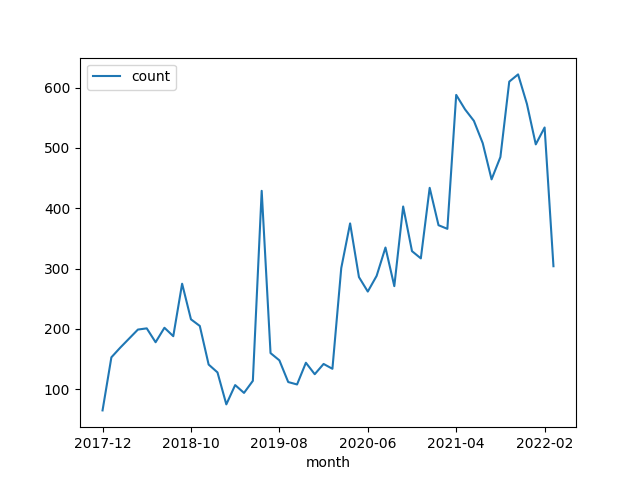

<AxesSubplot:xlabel='month'>

In [12]:
sums.plot()

<IPython.core.display.Javascript object>


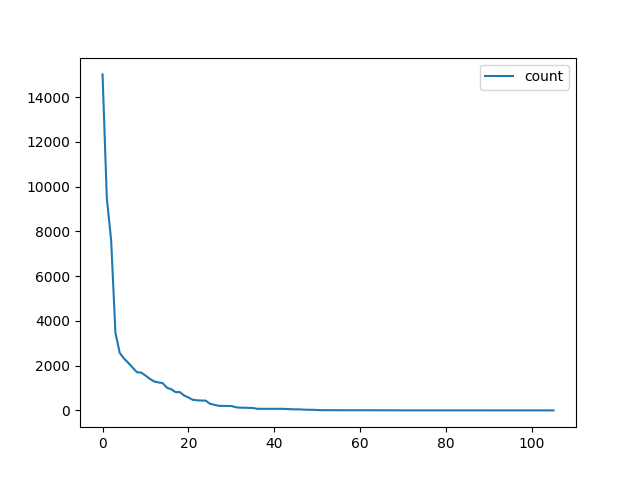

,url,count
0,http://www.transform-social.org/,15022
1,http://www.transform-social.org/robots.txt,9464
2,http://www.transform-social.org/wasistdas/,7624
3,http://www.transform-social.org/texte/eso/,3473
4,http://www.transform-social.org/texte/anarchie/,2573


In [13]:
grouped = df.groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False])
grouped = grouped.reset_index(drop=False)
grouped.plot()
grouped.head()

<IPython.core.display.Javascript object>


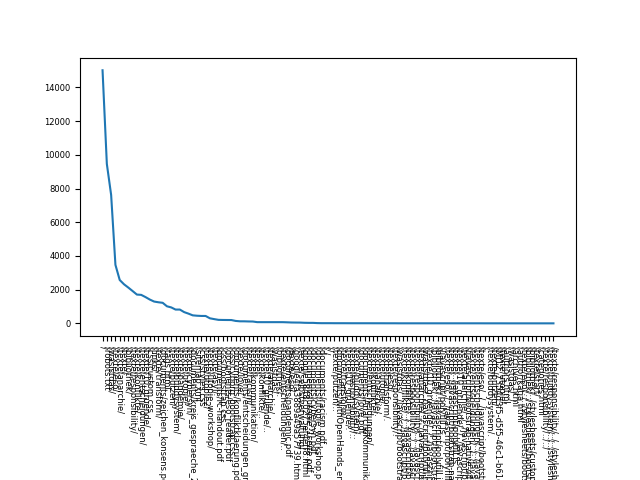

In [14]:
grouped = df.groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False])
grouped = grouped.reset_index(drop=False)
x = grouped['url'].index.values
y = grouped['count'].values
xticks = map(lambda x: x.replace('http://www.transform-social.org', ''), grouped['url'].values)
plt.figure(10)
plt.xticks(x, xticks, rotation=270)
plt.subplots_adjust(bottom=0.3)
plt.tick_params(labelsize=6)
plt.plot(x,y)
plt.show()

<IPython.core.display.Javascript object>


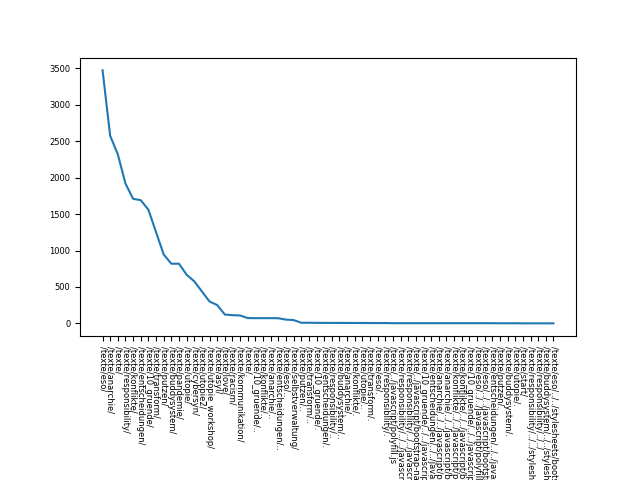

In [15]:
grouped = df[df['url'].str.startswith('http://www.transform-social.org/texte')].groupby(by = ['url']).sum().sort_values(by = ['count'], ascending = [False])
grouped = grouped.reset_index(drop=False)
x = grouped['url'].index.values
y = grouped['count'].values
xticks = map(lambda x: x.replace('http://www.transform-social.org', ''), grouped['url'].values)
plt.figure(11)
plt.xticks(x, xticks, rotation=270)
plt.subplots_adjust(bottom=0.3)
plt.tick_params(labelsize=6)
plt.plot(x,y)
plt.show()

<IPython.core.display.Javascript object>


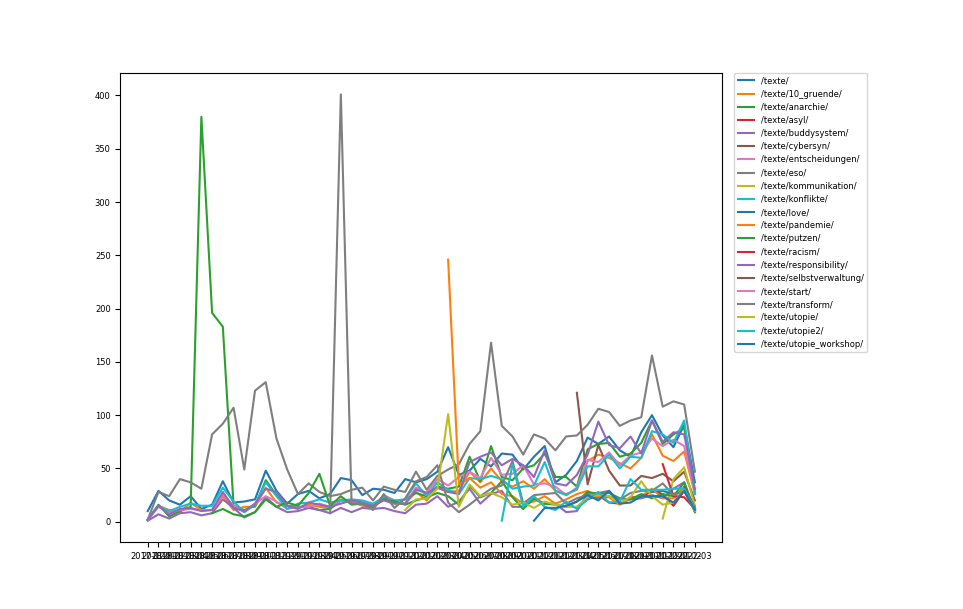

In [31]:
# reset defaults
%matplotlib notebook 

data = df[df['url'].str.startswith('http://www.transform-social.org/texte') & ~df['url'].str.contains('\/\.')]
urls = list(set(data['url'].tolist())) # uniq urls
urls.sort()
plt.figure(11)

for url in urls:
    subdata = data[data['url'].str.endswith(url)].sort_values(by=['month']).reset_index(drop = False)
    x = subdata['month'].values
    y = subdata['count'].values
    plt.plot(x,y)
    
legend = list(map(lambda x: x.replace('http://www.transform-social.org', ''), urls))
plt.legend(legend, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=6)
plt.tick_params(labelsize=6)
plt.subplots_adjust(right=0.75)
plt.show()

<IPython.core.display.Javascript object>


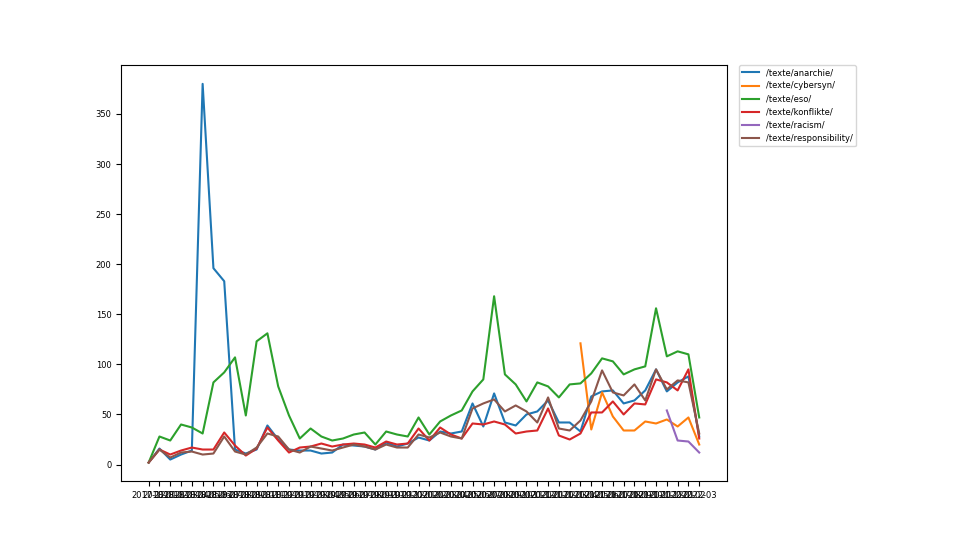

In [39]:
# reset defaults
%matplotlib notebook 

data = df[(
    df['url'].str.startswith('http://www.transform-social.org/texte/eso') |
    df['url'].str.startswith('http://www.transform-social.org/texte/anarchie') |
    df['url'].str.startswith('http://www.transform-social.org/texte/cybersyn') |
    df['url'].str.startswith('http://www.transform-social.org/texte/responsibility') |
    df['url'].str.startswith('http://www.transform-social.org/texte/konflikte') |
    df['url'].str.startswith('http://www.transform-social.org/texte/racism')) & 
    ~df['url'].str.contains('\/\.') 
]
urls = list(set(data['url'].tolist())) # uniq urls
urls.sort()
plt.figure(11)

for url in urls:
    subdata = data[data['url'].str.endswith(url)].sort_values(by=['month']).reset_index(drop = False)
    x = subdata['month'].values
    y = subdata['count'].values
    plt.plot(x,y)
    
legend = list(map(lambda x: x.replace('http://www.transform-social.org', ''), urls))
plt.legend(legend, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=6)
plt.tick_params(labelsize=6)
plt.subplots_adjust(right=0.75)
plt.show()